<h1>光頭傑夫製作</h1><img src="https://rolqiw.bl.files.1drv.com/y4mYqkObWmQmdJFd8pab8t8m7d_mFhh3_YG63fiAnPaG6gjahHFt0n087pF97x1W2wemm7hd4ZdiPD2OxoPtqcCD_4-Jy-fojnt97kGGWR4Hnq0-9Ny61afd7WVHVTmF_9pcr45OFDFSwLKByeQU1q9TjwKk-HsNmWVsW1eGQ4Gi-9G4pQ5DYoTxswYJ5r5dLF-kKsA1InEyrqmV3kF5pm4WQ?width=658&height=584&cropmode=none" style='width:160px;margin:0'/>

<h2 ><font color=red>Jupyter Notebook其實可以讓你開網頁</font></h2>

In [1]:
import webbrowser
webbrowser.open('https://www.google.com/')

True

<h2 ><font color=red>那接下來讓我們來研究一下網址</font></h2>

In [ ]:
import webbrowser
webbrowser.open('https://www.google.com.tw/maps/place/桃園市中正路1號')

<h2 ><font color=red>但是其實開網頁是給人看的，爬蟲只吃碼，所以...我們可以只下載碼,就好</font></h2>
<h3>requests模組出場</h3>

## [原廠文件](https://requests.readthedocs.io/en/master/)
---
1. 首先requests不是urllib.request，不要搞錯。 
2. requests不是python官方內建的功能，所以要用就需要pip一下

In [2]:
!pip install requests

In [3]:
#更新用這個
!pip install requests --upgrade

  Attempting uninstall: requests
    Found existing installation: requests 2.24.0
    Uninstalling requests-2.24.0:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] 存取被拒。: 'c:\\programdata\\anaconda3\\lib\\site-packages\\requests-2.24.0.dist-info\\direct_url.json'
Consider using the `--user` option or check the permissions.



### <span style="color:red ">安裝好以後，測試一下工具

In [5]:
import requests
requests.__version__

'2.24.0'

In [2]:
help(requests)

Help on package requests:

NAME
    requests

DESCRIPTION
    Requests HTTP Library
    ~~~~~~~~~~~~~~~~~~~~~
    
    Requests is an HTTP library, written in Python, for human beings.
    Basic GET usage:
    
       >>> import requests
       >>> r = requests.get('https://www.python.org')
       >>> r.status_code
       200
       >>> b'Python is a programming language' in r.content
       True
    
    ... or POST:
    
       >>> payload = dict(key1='value1', key2='value2')
       >>> r = requests.post('https://httpbin.org/post', data=payload)
       >>> print(r.text)
       {
         ...
         "form": {
           "key1": "value1",
           "key2": "value2"
         },
         ...
       }
    
    The other HTTP methods are supported - see `requests.api`. Full documentation
    is at <https://requests.readthedocs.io>.
    
    :copyright: (c) 2017 by Kenneth Reitz.
    :license: Apache 2.0, see LICENSE for more details.

PACKAGE CONTENTS
    __version__
    _internal_utils

### <span style="color:red "><案例說明>擷取Wiki
-------
#### <request 使用步驟>    
    1. 導入工具request
    2. 用requests.get()開啟目標網址=>request知道幫你發出這個request
    3. requests.get()發出後，會拿到一個requests.Response=>request會先幫你解譯。

In [7]:
import requests

link = "https://en.wikipedia.org/wiki/List_of_most_popular_websites"
response = requests.get(link)
print(type(response))
print('-'*50)
print(dir(response))
print('-'*50) 
text = response.text
print(text) 

<class 'requests.models.Response'>
--------------------------------------------------
['__attrs__', '__bool__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__nonzero__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_content', '_content_consumed', '_next', 'apparent_encoding', 'close', 'connection', 'content', 'cookies', 'elapsed', 'encoding', 'headers', 'history', 'is_permanent_redirect', 'is_redirect', 'iter_content', 'iter_lines', 'json', 'links', 'next', 'ok', 'raise_for_status', 'raw', 'reason', 'request', 'status_code', 'text', 'url']
--------------------------------------------------
<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta c

### <span style="color:red ">我們來看看Response可以怎麼處理

In [8]:
#response的網址
response.url

'https://en.wikipedia.org/wiki/List_of_most_popular_websites'

In [9]:
#response的狀態碼
response.status_code

200

### <span style="color:red ">再測試一個網址看看

In [10]:
import requests
url='https://www.google.com.tw/?hl=zh-TW'
html=requests.get(url)
if html.status_code==requests.codes.ok:
   print('你好棒!')
else:
   print('糟糕了!')

你好棒!


<h2>http呼叫會出現的回覆碼</h2>

每個回覆碼是一台伺服器想要給你的回應
---

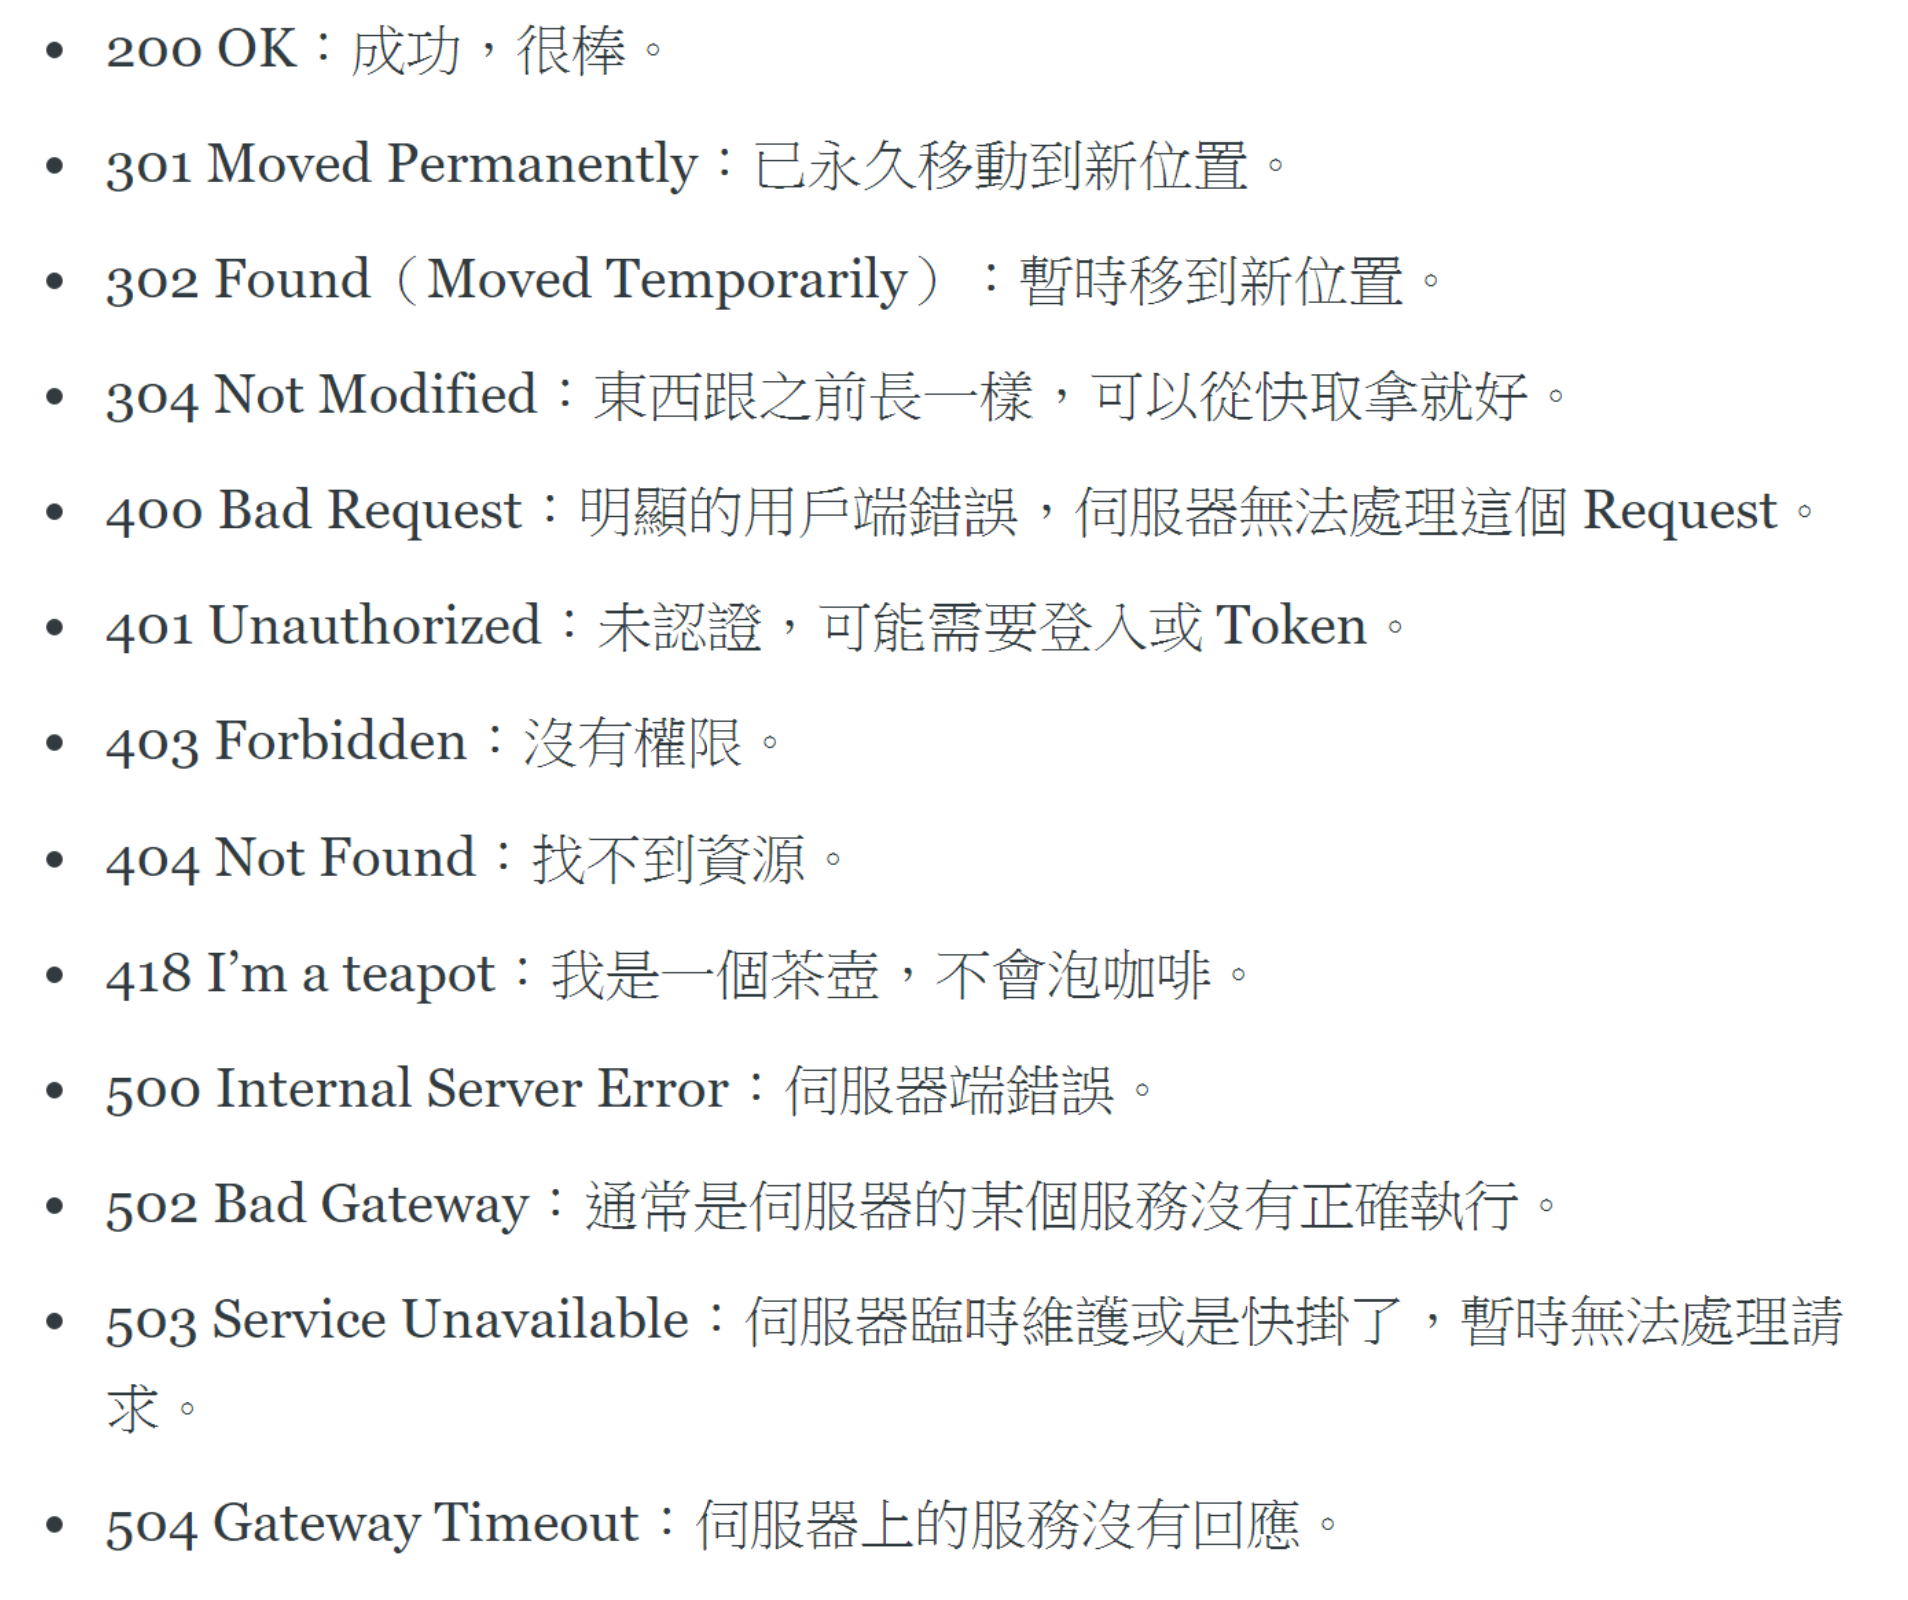

In [7]:
response.headers

{'Date': 'Tue, 27 Apr 2021 06:12:48 GMT', 'Vary': 'Accept-Encoding,Cookie,Authorization', 'Server': 'ATS/8.0.8', 'X-Content-Type-Options': 'nosniff', 'P3p': 'CP="See https://en.wikipedia.org/wiki/Special:CentralAutoLogin/P3P for more info."', 'Content-Language': 'en', 'X-Request-Id': '06f9d236-2c1d-40a6-b604-5a71a33dbc10', 'Last-Modified': 'Fri, 16 Apr 2021 23:40:45 GMT', 'Content-Type': 'text/html; charset=UTF-8', 'Content-Encoding': 'gzip', 'Age': '9902', 'X-Cache': 'cp5007 miss, cp5012 hit/8', 'X-Cache-Status': 'hit-front', 'Server-Timing': 'cache;desc="hit-front", host;desc="cp5012"', 'Strict-Transport-Security': 'max-age=106384710; includeSubDomains; preload', 'Report-To': '{ "group": "wm_nel", "max_age": 86400, "endpoints": [{ "url": "https://intake-logging.wikimedia.org/v1/events?stream=w3c.reportingapi.network_error&schema_uri=/w3c/reportingapi/network_error/1.0.0" }] }', 'NEL': '{ "report_to": "wm_nel", "max_age": 86400, "failure_fraction": 0.05, "success_fraction": 0.0}', 'Pe

In [8]:
response.headers['Content-Type']

'text/html; charset=UTF-8'

In [10]:
#這是從response裡面讀當初request裡面的header
response.request.headers

{'User-Agent': 'python-requests/2.25.1', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [9]:
#response的編碼方式
response.encoding

'UTF-8'

### <span style="color:red ">返回的內容可能是圖片

In [12]:
#.content : 返回的是bytes型數據，一般適用於圖片、文件。
import requests

link = "https://img.ruten.com.tw/s2/7/93/16/21934581724950_236.jpg"
response = requests.get(link)

response.content

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x02{\x03 \x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\

### <span style="color:red ">也有可能是字串

In [ ]:
#.text : 返回的是 Unicode型數據，一般適用於字串
import requests

link = "https://en.wikipedia.org/wiki/List_of_most_popular_websites"
response = requests.get(link)
response.text

## <span style="color:red "><查詢字串>-讓你的URL帶參數
-------
### [先點一下這個網址](http://www.webscrapingfordatascience.com/paramhttp/.)
------
### [<span style="color:pink ">再試一下這個網址](http://www.webscrapingfordatascience.com/paramhttp/?query=test)
------
    你有看到差異嗎?
    URL裡面的“?…”，我們稱為這個是查詢字串
    這是你get過程，需要提供的資料，但是這些資料又不是URL的路徑結構的一部分。
    譬如:
```
     https://zh.wikipedia.org/w/index.php?search=披薩
```

## <span style="color:red ">你可以了解並解釋下面兩個網址的差異嗎?
-------

```
   http://www.webscrapingfordatascience.com/paramhttp/?query=test 
```
    
```
   http://www.webscrapingfordatascience.com/paramhttp/?query=anothertest
```

## <span style="color:red ">查詢字串的特點
-------

1. 開頭一定是“?”打頭。
2. 每一個參數都是鍵值對，但是請用'='取代你習慣的':'
3. 每一個參數會用'&'分開
4. 對http的語法來說，某些符號已經有特別的意義，譬如:“/”, “?”, “&”, “=” 等等。所以如果參數裡面要用到，就要經過特別編碼。
```
    http://www.webscrapingfordatascience.com/paramhttp/?query=another%20test%3F%26
```
    ===>這個參數是“another test?&”
5. 當然http不會懂中文，所以中文也要編碼。
----
### [URL編碼連結](https://www.ifreesite.com/urldecoderencoder.htm)    
    
----
    近幾年，查詢字串的寫法模式漸漸在改變
    “products.html?p=302”==>“/product/302/”
    漸漸地希望用結構路徑的方式取代?的表達
    因為SEO引擎比較愛這種表達方式

## <span style="color:red "><查詢字串>-requests和查詢字串共舞

### <span style="color:red "><第一法>-不管，直接寫啊!!

In [13]:
import requests
url = 'http://www.webscrapingfordatascience.com/paramhttp/?query=test'
r = requests.get(url)
print(r.text)

I don't have any information on "test"


### <span style="color:red "><插句話>-其實requests很想幫你做更多

In [14]:
import requests
url = 'http://www.webscrapingfordatascience.com/paramhttp/?query=a query with spaces'
r = requests.get(url)

# 啊不是說要轉碼，啊現在怎麼不用轉
# requests會自動幫你轉碼成 'a%20query%20with%20spaces'
# 不信看下面，都不用你動手，就會幫你帶出完整網址[...]/paramhttp/?query=a%20query%20with%20spaces
print(r.request.url)

print(r.text)

http://www.webscrapingfordatascience.com/paramhttp/?query=a%20query%20with%20spaces
I don't have any information on "a query with spaces"


### <span style="color:red "><但是>-requests的能力是有限的

In [15]:
import requests

url = 'http://www.webscrapingfordatascience.com/paramhttp/?query=complex?&'

# 因為requests沒有察覺，所以Parameter沒有轉碼，直接把?&都帶進來(?和&不是要轉碼)
r = requests.get(url)

# 看一下路徑結果==>[...]/paramhttp/?query=complex?&
print(r.request.url)

#那這個http出去，就看server怎麼解釋了....每一台都不一樣，這一台只抓到?為止
print(r.text)

http://www.webscrapingfordatascience.com/paramhttp/?query=complex?&
I don't have any information on "complex?"


### <span style="color:orange ">看來，硬寫也不一定可以解決問題!!

### <span style="color:red "><第二法>-來個優雅且看得懂的方法吧!
----
    正確的使用parameters，再也沒有煩惱憂愁

In [ ]:
import requests
url = 'http://www.webscrapingfordatascience.com/paramhttp/'
parameters = {
   'query': 'a query with /, spaces and?&'
}
r = requests.get(url, params=parameters)
print(r.url)
print(r.text)

### <span style="color:red "><第三法>－用函數模組把你要處理的步驟封裝起來

In [16]:
import requests
def calc(a, b, op):
    url = 'http://www.webscrapingfordatascience.com/calchttp/'
    params = {'a': a, 
              'b': b, 
              'op': op}
    r = requests.get(url, params=params)
    return r.text
print(calc(4, 6, '*'))
print(calc(4, 6, '/'))

24
0.66666666666667


## <span style="color:red "><小測驗>試試看博客來
-----
    來來來，麻煩你幫我設計一個function，讓我可以輸入我要的類別關鍵字
    比如search('python')
    讓可以讓博客來把相關書籍回傳給我
    

### <span style="color:red "><答案>

In [17]:
import requests
def search(target):
    url = 'https://search.books.com.tw/search/query/key/'
    serch=target
    tail='/cat/all'
    url=url+serch+tail
    r = requests.get(url)
    return r.text
print(search('python'))

<!DOCTYPE html>
<html lang="zh-Hant-TW">
<head>
<meta charset="UTF-8">
<title>博客來-目前您搜尋的關鍵字為: python</title>
<meta name="keywords" content='博客來,全館,python'>
<meta name="description" content='博客來搜尋,關鍵字:python,分類:全館'>
<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
<meta property="og:site_name" content="博客來"/>
<meta property="og:type" content="product" />
<meta property="og:image" content="//www.books.com.tw/csss/images/books_logo.png" />
<meta property="og:url" content="https://www.books.com.tw/" />
<meta property="og:description" content="" />
<link href="//jci.book.com.tw/css/grid/reset.min.css?v=5f91476f" rel="stylesheet" type="text/css" media="all">
<link href="//jci.book.com.tw/css/grid/grid-1200.min.css?v=5f68170b" rel="stylesheet" type="text/css" media="all">
<link href="//jci.book.com.tw/css/iconfont/icon_01.css?v=6075357d" rel="stylesheet" type="text/css" media="all">
<link href="//jci.book.com.tw/css/header/header-full.css?v=6073f764" rel="stylesheet" type="text/

### <span style="color:red ">可以下載Json檔

In [ ]:
import requests
link = "https://datacenter.taichung.gov.tw/swagger/OpenData/552cb64e-7a7d-4052-a1ba-03da04f1b552"
response = requests.get(link).json()

for i in range(10): #read 10 stationName from JSON response.
    for key,value in response[i].items():
        print(f'{key}:{value}')
    print('-------------------------------------------------------------------')